In [1]:
# importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns



In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px
from scipy.stats import boxcox
init_notebook_mode(connected=True)

In [4]:
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',200)

## READING THE FILE

In [5]:
app_data=pd.read_csv(r'C:\Users\SATYUG\OneDrive\Desktop\DSC-42\DATA Visualisation\Credit EDA Case Study-20220714T131800Z-001\Credit EDA Case Study\application_data.csv') 
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking shape of Spreadsheet

In [6]:
app_data.head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app_data.shape

(307511, 122)

In [8]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [18]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
# Finding the missing Data/ missing values from the Spread sheet.

In [20]:
app_data.isnull().sum() # total null/missing values

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [21]:
null_percent=(100*app_data.isnull().sum()/len(app_data))

# chcecking the columns having null values more that 40%
and then will remove those columns as they have high number of missing data.

IndexError: index 0 is out of bounds for axis 0 with size 0

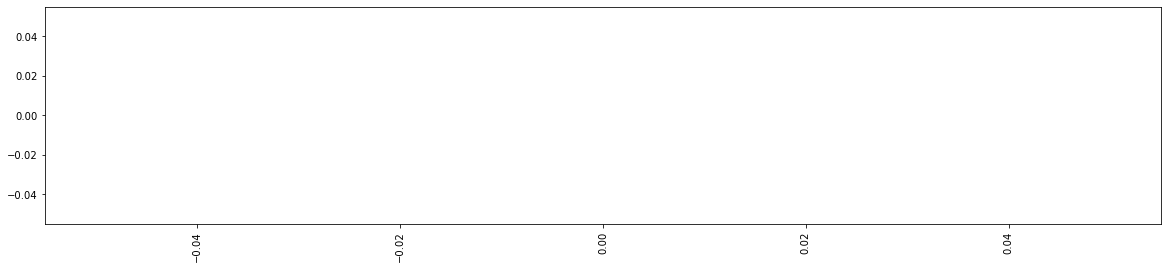

In [22]:
null_col=app_data.isnull().sum().sort_values(ascending = False)
null_col=null_col[null_col.values>(0.40*len(app_data))]
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="green")
plt.title('Column where null values are more than 40%')
plt.show()
len(null_col)


In [ ]:
null_percent.sort_values(ascending = False)

In [ ]:
# Removing Null columns greatred than 40 %

In [ ]:
def NullDeletion (dataframe,percent=0.40):
    df = dataframe.copy()
    ishape = df.shape
    colname = (df.isnull().sum()/len(df))
    colname = list(colname[colname.values>=percent].index)
    df.drop(labels = colname,axis =1,inplace=True)        
    print("Number of Columns deleted\t: ",len(colname))    
    print("\nOld rows,columns",ishape,"\nNew rows,columns",df.shape)
    return df

In [23]:
app_data=NullDeletion(app_data,percent=0.40)

Number of Columns deleted	:  0

Old rows,columns (307511, 73) 
New rows,columns (307511, 73)


In [24]:
# Again checking for the remaining percent of null values in the dataset.

In [25]:
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [26]:
# As per my inderstanding removing some unwanted columns by manually looking into the columns names and establishing realtion with the required problem,
#the columns that I found un-necessary are being removed.
# for e.g. the company has does not need to know that whether or not the client has given his email, mobile no, his emp no.,
# or any such details to determine if the client should get a loan or not. In this case giving PAN carrd detials will only suffice.

stray_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=stray_cols,axis=1,inplace=True)



# Imputing values into the reamaining columns with some null values.

# checking for the remaining null value columns


In [27]:
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER     

In [28]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

1. occupation_type can be imputed with the mode of the column, since it is a object type and a categorical variable, so instead
of going with mean/median we will impute the highest occuring value in place of nulls.

In [29]:
app_data.OCCUPATION_TYPE.value_counts()
app_data.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [30]:
app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [31]:
app_data.loc[app_data['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE']= 'Laborers'

In [32]:
app_data.OCCUPATION_TYPE.isnull().sum()

0

2. similarly for amt_req_credit_bureau_year can be seen as categorical as it has only the years,so we will impute the most
number of occuring value in place of nulls.

In [33]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [34]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

We can do the same thing for the colums 'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT', as these columns give the details only
of credit inquiries so adding the most frequent value to them is the right way. i.e. imputing mode().

In [35]:
print(app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())

41519
41519
41519
41519
41519


In [36]:
print(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode())
print(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode())


0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [37]:
app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY']= 0.0
app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']= 0.0
app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull(),'AMT_REQ_CREDIT_BUREAU_MON']= 0.0
app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(),'AMT_REQ_CREDIT_BUREAU_QRT']= 0.0
app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK']= 0.0

In [38]:
print(app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())

0
0
0
0
0


3. we can impute the median for amt-goods-price, as it is a price of some goods so replacing the missing values with median
would not affect the data set, as we are in a way just considering the mid price and assigning to the nulls. i.e. 450000

In [39]:
app_data.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [40]:
app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [41]:
app_data.AMT_GOODS_PRICE.median()

450000.0

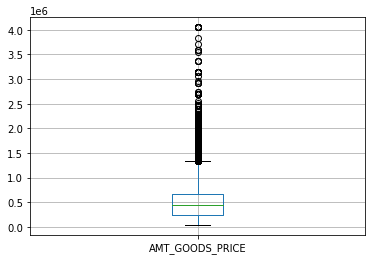

In [42]:
app_data.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

In [43]:
app_data.loc[app_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']= app_data.AMT_GOODS_PRICE.median()

In [44]:
app_data.AMT_GOODS_PRICE.isnull().sum()

0

## 

In same way we can also impute the column amt-annuity with  the median, following the same logic as above.


In [45]:
app_data.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [46]:
app_data.AMT_ANNUITY.median()

24903.0

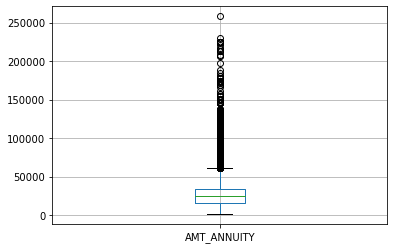

In [47]:
app_data.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [48]:
app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= app_data.AMT_ANNUITY.median()

In [49]:
app_data.AMT_ANNUITY.isnull().sum()

0

# Finding Errors in data.

##### 1. Some columns had XNA as values present, here I checked and took care of those values.

In [50]:


# Checking for column Code-Gender.

In [51]:
app_data[app_data['CODE_GENDER']=='XNA'].shape

(4, 43)

In [52]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [53]:
app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [54]:
# Checking for column Organization-type

In [55]:
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 43)

In [56]:
app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 43)

# 

# 

##### 2.Checking for negative values in columns, as there were some negative numbers in the data set.

In [57]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  AMT_GOODS_PRICE              252137 non-null  float64
 11  NAME_TYPE_SUITE              251041 non-null  object 
 12  NAME_INCOME_TYPE             252137 non-null  object 
 13 

In [58]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# I took out the what are the unique values count in each column
app_data.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION          2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    7
NAME_TYPE_SUITE                     7
DEF_60_CNT_SOCIAL_CIRCLE            8
AMT_REQ_CREDIT_BUREAU_DAY           8
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_YEAR         22
AMT_REQ_CRED

In [60]:
# Verified again for columns for negative numbers, and below columns had negative values in them

print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())

[ -9461 -16765 -19046 ... -23693 -24968 -24319]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -12316. -14083. -12372.]
[-2120  -291 -2531 ... -5965 -5854 -6211]


In [61]:
negative_cols=[col for col in app_data if col.startswith('DAYS')]
negative_cols

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [62]:
app_data[negative_cols]=abs(app_data[negative_cols])

In [63]:
# verifying again if the values changes.

print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())

[ 9461 16765 19046 ... 23693 24968 24319]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 12316. 14083. 12372.]
[2120  291 2531 ... 5965 5854 6211]


# 

# Binning of variables

In [64]:
# Binning AMT_INCOME_RANGE using pd.qcut
app_data['AMT_INCOME_RANGE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])
app_data['AMT_INCOME_RANGE'].head(15)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
9           LOW
10     VERY_LOW
12     VERY_LOW
13       MEDIUM
14       MEDIUM
15          LOW
16     VERY_LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [65]:
# Binning AMT_CREDIT_RANGE using pd.qcut
app_data['AMT_CREDIT_RANGE'] = pd.qcut(app_data.AMT_CREDIT, q=[0,0.2,0.5,0.8,0.95,1],labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])
app_data['AMT_CREDIT_RANGE'].head(15)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
9           LOW
10       MEDIUM
12     VERY_LOW
13         HIGH
14       MEDIUM
15          LOW
16          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [66]:
#Converting birth days into years, as this could also help in creating a new bin.

app_data['DAYS_BIRTH']=(app_data['DAYS_BIRTH']/365).astype(int)

In [67]:
app_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 39, 27, 36, 38, 23, 35, 26, 48, 31, 50,
       40, 30, 43, 28, 41, 32, 33, 47, 57, 44, 21, 55, 49, 56, 53, 42, 29,
       64, 62, 59, 34, 63, 22, 24, 58, 60, 61, 65, 67, 68, 66, 69, 20])

In [68]:
# Bining DAYS_BIRTH using pd.cut, as here I have defined my own range of values to be used as bins.

app_data['DAYS_BIRTH_RANGE']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young','Middle_Age','Senior_Citizen'])

In [69]:
app_data.DAYS_BIRTH_RANGE.value_counts()

Middle_Age        155746
Young              75643
Very_Young         16267
Senior_Citizen      4481
Name: DAYS_BIRTH_RANGE, dtype: int64

# 

# CHECKING FOR OUTLIERS

Box plot is the best method as taught if we want an clean insight on finding outliers

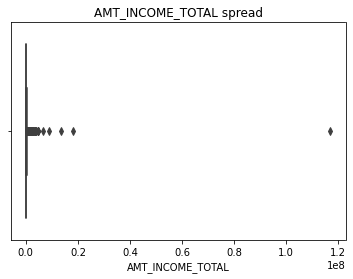

In [70]:
# creating boxplot for AMT_INCOME_TOTAL column to see the outliers
sns.boxplot(data=app_data, x="AMT_INCOME_TOTAL").set(title='AMT_INCOME_TOTAL spread')
#plt.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

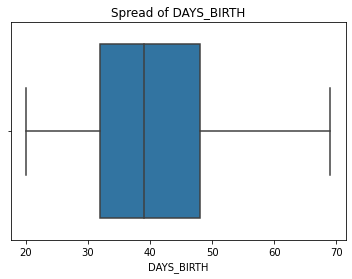

In [71]:
# Creating boxplot for DAYS_BIRTH for outliers
sns.boxplot(data=app_data,x="DAYS_BIRTH").set(title='Spread of DAYS_BIRTH')
plt.show()

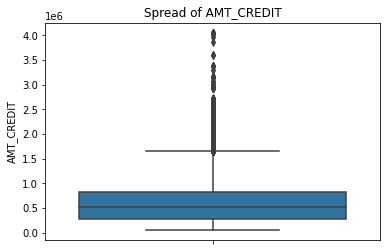

In [72]:
# Boxplot for AMT_CREDIT
sns.boxplot(data=app_data,y="AMT_CREDIT").set(title='Spread of AMT_CREDIT')
plt.show()

In [73]:
# Boxplot for AMT_ANNUITY

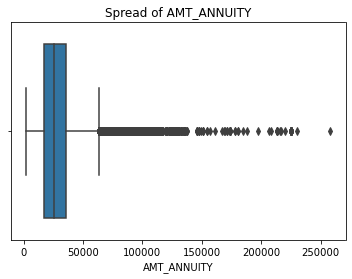

In [74]:
sns.boxplot(data=app_data,x="AMT_ANNUITY").set(title='Spread of AMT_ANNUITY')
plt.show()

# 

# DISTRIBUTION TYPE

In [75]:
# Distribution of organization_type

In [76]:
dist_org_type= app_data["ORGANIZATION_TYPE"].value_counts()

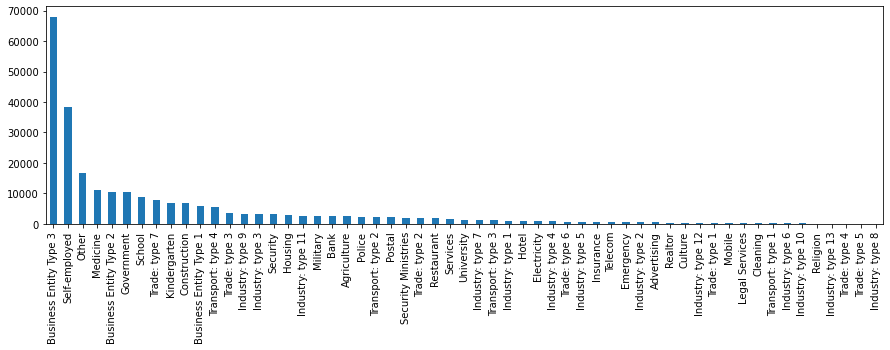

In [77]:
plt.figure(figsize=(15,4))
dist_org_type.plot.bar()
plt.xticks(rotation=90)
plt.show()

By the above plot we can see that the 1st entity i.e. "Business Entity Type 3" leads in loan application

## 

In [78]:
# Distribution of occupation_type

In [79]:
dist_occupation_type= app_data["OCCUPATION_TYPE"].value_counts()

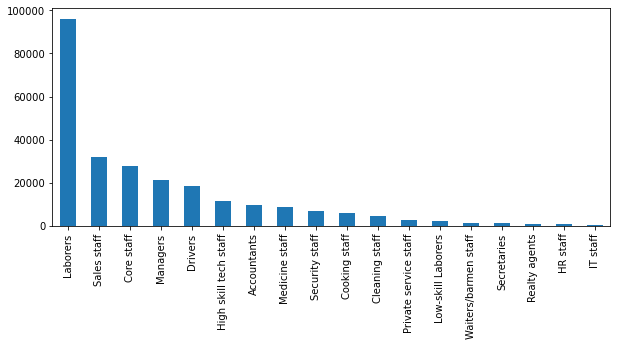

In [80]:
plt.figure(figsize=(10,4))
dist_occupation_type.plot.bar()
plt.xticks(rotation=90)
plt.show()

From the above plot we see that the majority of the working type is "Labourers" and "IT Staffs" are
the lowest category of occupation, of clients applying for loan.

## 

## Checking for Data Imbalance & Imbalance Ratio

 dividing the data into 2 parts in order to use accordingly as asked in question based in TARGET column
 Target =1(Clients with Payment Difficulties) and Target=0(All Other)

In [81]:
target_0=app_data.loc[app_data["TARGET"]==0]
target_1=app_data.loc[app_data["TARGET"]==1]

In [82]:
target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VERY_LOW,VERY_LOW,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,LOW,LOW,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LOW,LOW,Middle_Age
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,VERY_LOW,LOW,Middle_Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,32,399,675.0,3936,Core staff,SATURDAY,11,0,0,0,0,0,0,Bank,0.501221,0.609276,9.0,3.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,VERY_LOW,LOW,Young
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45,7258,9798.0,259,Sales staff,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,LOW,LOW,Middle_Age
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25,236,8456.0,1982,Sales staff,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,LOW,VERY_LOW,Very_Young
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,41,7921,6737.0,5150,Managers,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,LOW,MEDIUM,Middle_Age


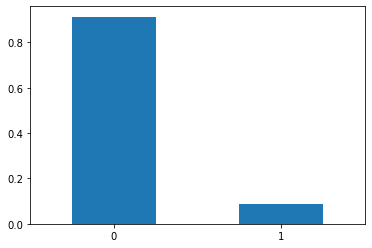

In [83]:
(app_data.TARGET.value_counts()/ len(app_data)).plot.bar()
plt.xticks(rotation=0)
plt.show()

As we can see here the number of target_0 value is very much higher that target_1,
hence the data set is not balanced

To calculate the imbalance ratio, i took the ration of larger value to smaller value

In [84]:
round(len(target_0)/len(target_1),2)

10.55

THE IMBALANCE RATIO IS 10.55 ROUNDED TO 2 DECIMAL PLACES.

### 

## 

## UNIVARITATE ANALYSIS OF DIFFERENT COLUMNS.

In [85]:
# univariate analysis for income range of both the types target=1 and target=0

INCOME RANGE

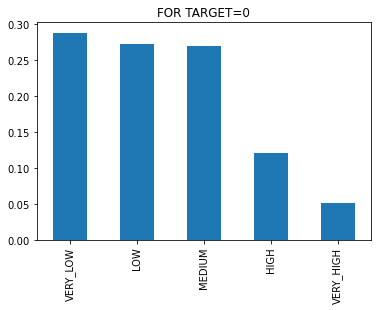

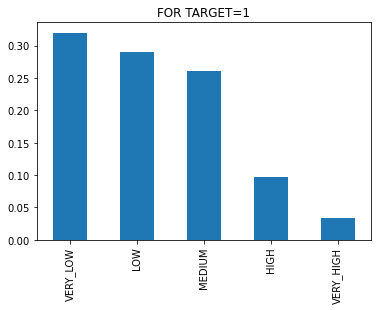

In [86]:
target_0.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()

plt.title("FOR TARGET=0")
plt.show()

target_1.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()

plt.title("FOR TARGET=1")
plt.show()


From the above plot we see that for both target 1 and target 0 the Very_low category is the highest
and varu_high is lowest. We can say that people with higher income take less loans and also are the
least defaulters when compared to people with very low income for both the target categories.

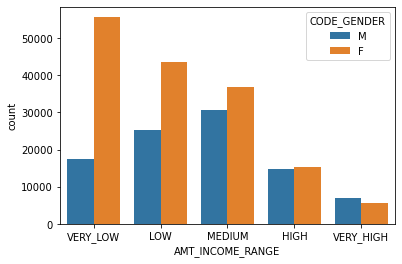

In [87]:
sns.countplot(x='AMT_INCOME_RANGE',hue="CODE_GENDER",data=app_data)
plt.show()

INCOME TYPE

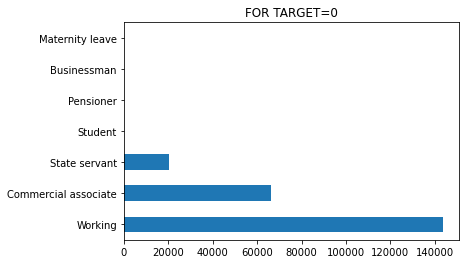

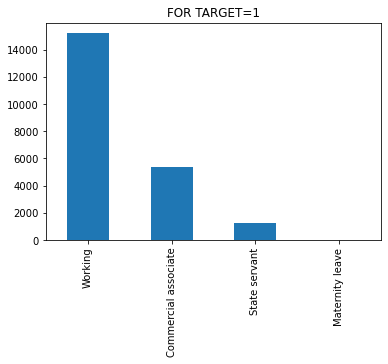

In [88]:
target_0.NAME_INCOME_TYPE.value_counts(normalize=False).plot.barh()

plt.title("FOR TARGET=0")
plt.show()

target_1.NAME_INCOME_TYPE.value_counts(normalize=False).plot.bar()

plt.title("FOR TARGET=1")
plt.show()


From the above we can say that the for Target=0 the first 3 categories have higher credits than others,
now ,
Also Majority of the defaluters are from Working category
for Target 1 'student','pensioner'and'Businessman' dont do any late payments as these categories
are not shown in the target=1 graph

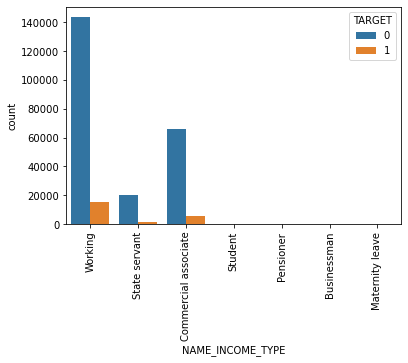

In [89]:
sns.countplot(x='NAME_INCOME_TYPE',hue="TARGET",data=app_data)
plt.xticks(rotation=90)
plt.show()

EDUCATION TYPE

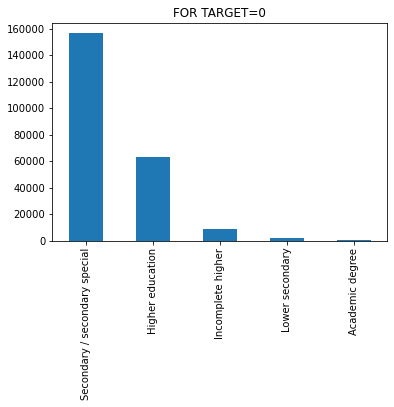

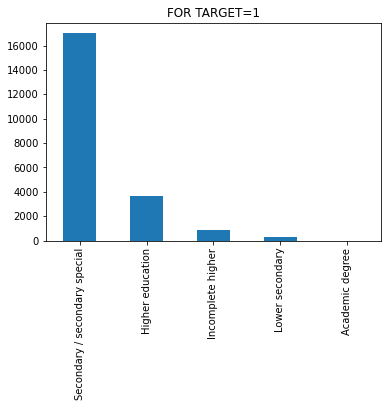

In [90]:
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=False).plot.bar()

plt.title("FOR TARGET=0")
plt.show()

target_1.NAME_EDUCATION_TYPE.value_counts(normalize=False).plot.bar()

plt.title("FOR TARGET=1")
plt.show()


Here we see that there is no such major differece in loan application based on education type,
as the highest point and lowest point is nearly same, and also the other values are also nearly same
for both Target 0 & 1

FAMILY STATUS

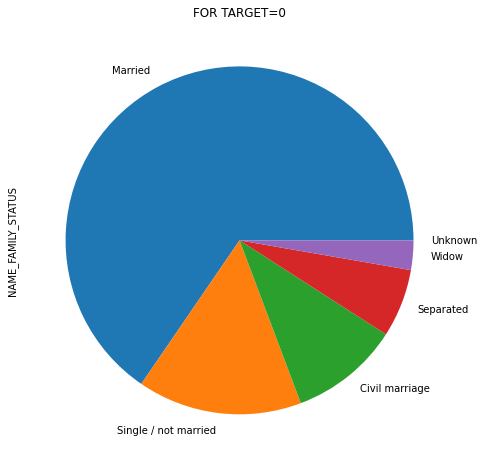

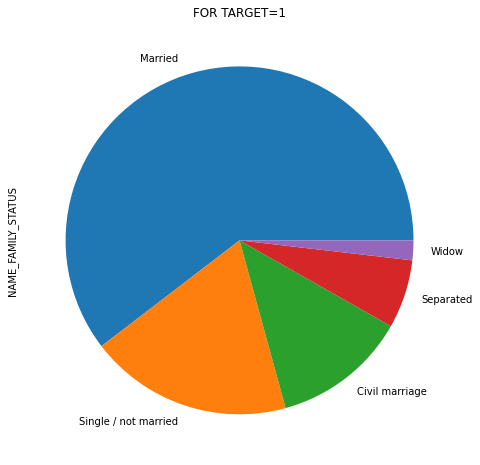

In [91]:
plt.figure(figsize=[15,8])
target_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie()

plt.title("FOR TARGET=0")
plt.show()

plt.figure(figsize=[15,8])
target_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie()

plt.title("FOR TARGET=1")
plt.show()

At first glance we see that there is no such major difference b/w the two.
But for Target=0 there are few unknown values also, but not in Target=1.
Also Married people are taking more loans and also are the highest defaulters amongst the others.

## 

## 

## 

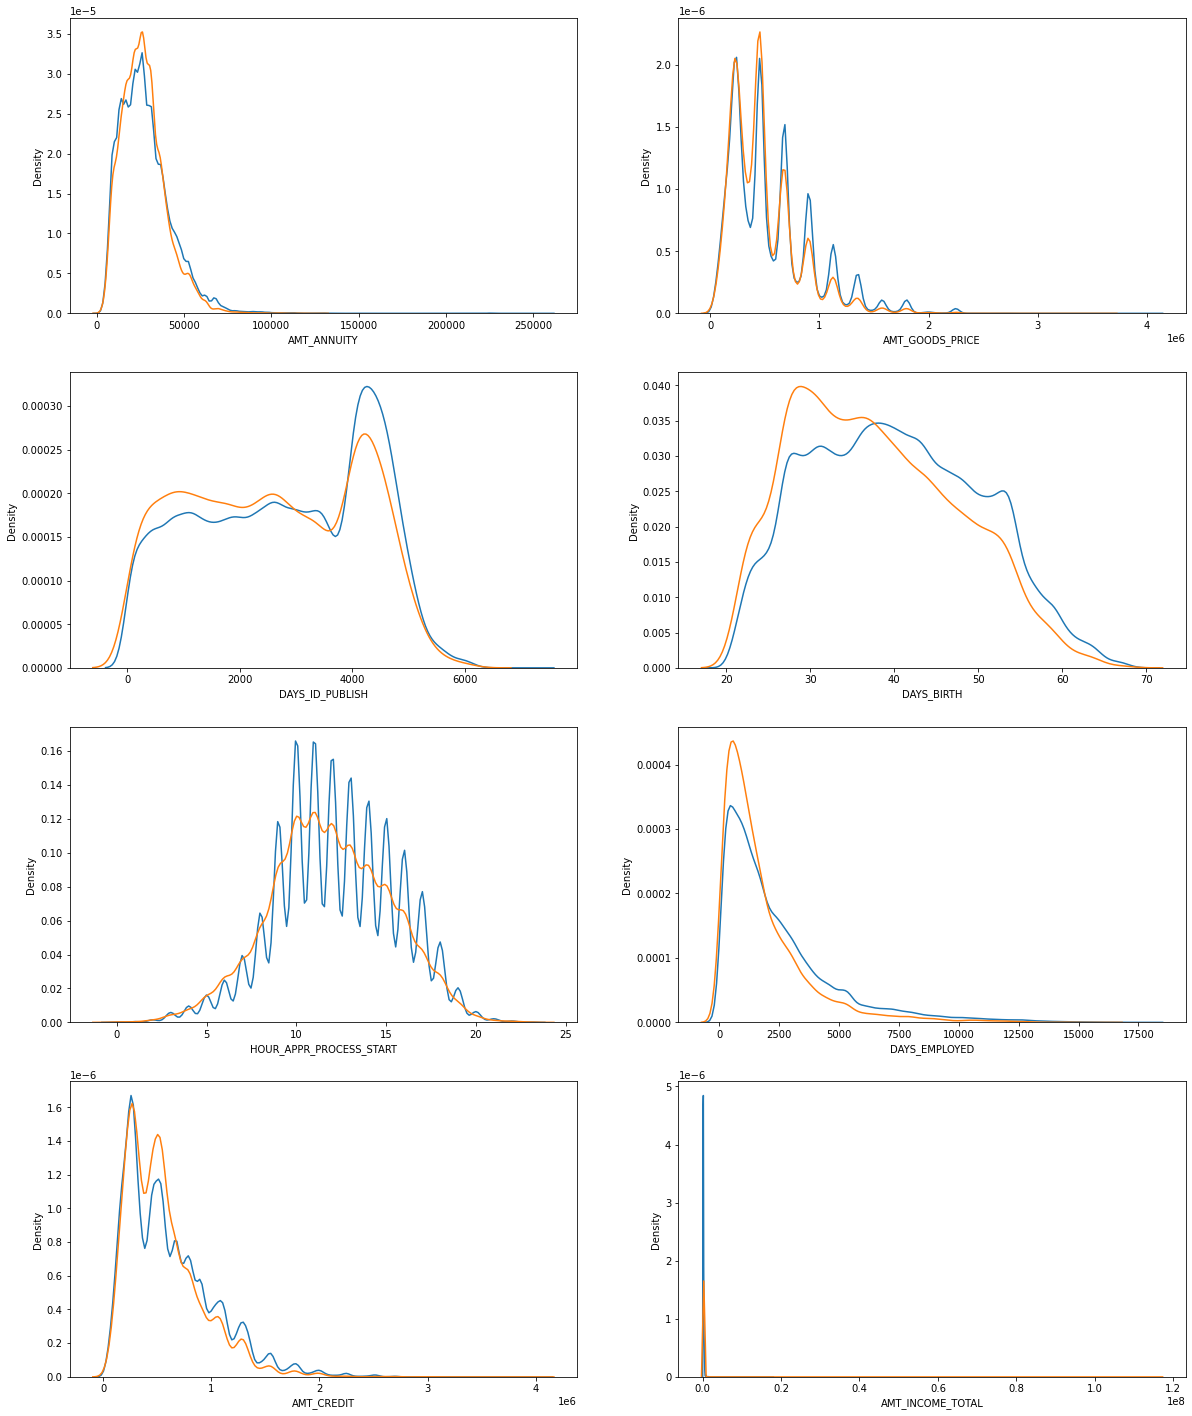

In [92]:
#considering continous numerical columns
cts_Numeric_column=['AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(20,25))
for i in (enumerate(cts_Numeric_column)):
    plt.subplot(len(cts_Numeric_column)//2,2,i[0]+1)
    sns.distplot(target_0[i[1]].dropna(),hist=False,label='Target : 0')
    sns.distplot(target_1[i[1]].dropna(),hist=False,label='Target : 1')
plt.show() 

## 

In [88]:
# Considering some Categorical columns

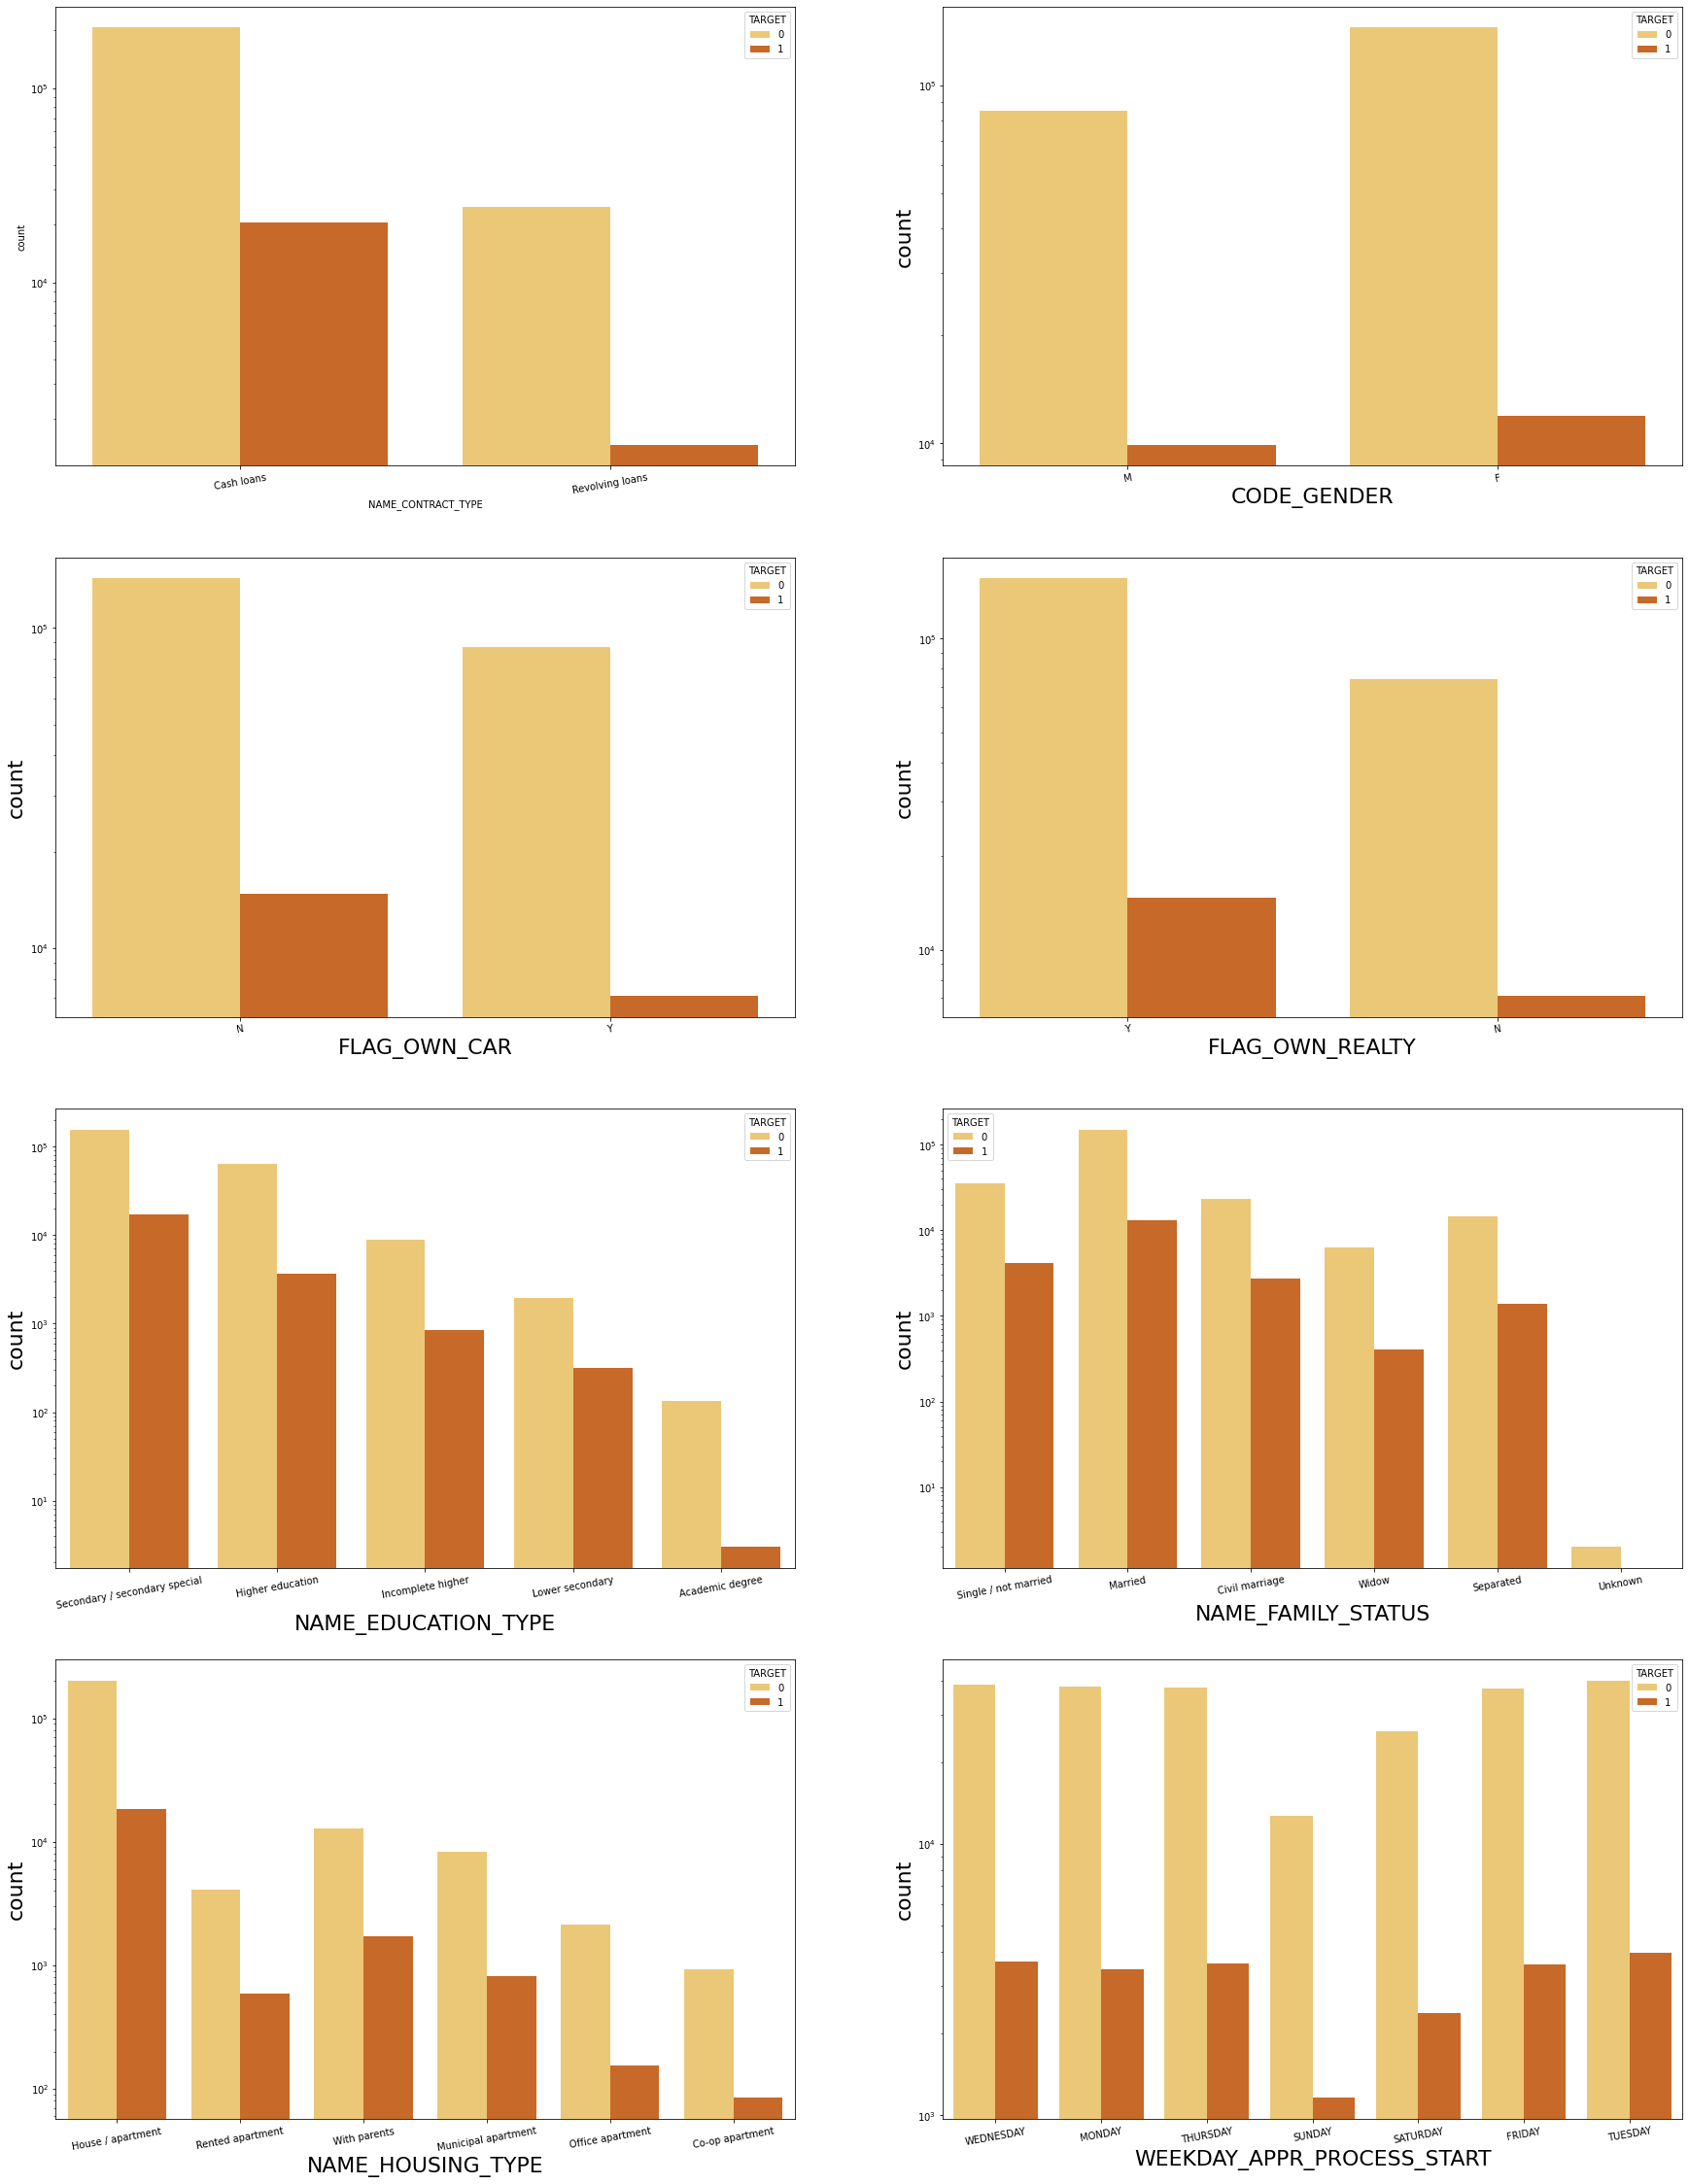

In [93]:
cts_categorical_column=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(30,40))
for i in (enumerate(cts_categorical_column)):
    plt.subplot(len(cts_categorical_column)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=app_data,palette='YlOrBr')
    plt.yscale('log')
    plt.rcParams["axes.labelsize"] = 22
    plt.xticks(rotation=10)
plt.show()

## 

## LOOKING AT CORRELATION

correlation is done for numberical columns. Here it will be done for both TARGET=0 and TARGET=1 Variable.

In [94]:
target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230302 entries, 1 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  AMT_GOODS_PRICE              230302 non-null  float64 
 11  NAME_TYPE_SUITE              229267 non-null  object  
 12  NAME_INCOME_TYPE             230302 non-null

In [95]:

target_0_corr=target_0.corr(method='pearson')
target_1_corr=target_1.corr(method='pearson')


In [96]:
target_0_corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001179,-0.000387,-0.000094,0.000949,0.000005,-0.000269,-0.000202,-0.000275,-0.000699,0.001145,0.003289,-0.003709,-0.001431,0.000923,0.001327,0.001012,0.000647,0.002262,0.000560,0.003557,-0.001957,-0.001662,0.000679,0.000400,0.000186,0.003899
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007612,-0.022293,-0.030352,-0.242410,-0.063036,-0.162900,0.117746,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,-0.015157,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.032376
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400752,0.333292,0.169306,0.045638,0.030102,-0.034508,0.026462,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.052724,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.025002
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762103,0.986471,0.103876,0.152597,0.087500,0.015180,0.034914,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,0.056919,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.051741


In [97]:
target_1_corr.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.006616,-0.011094,0.000820,-0.007284,0.000596,0.007684,0.004942,-0.000376,-0.003792,0.002790,0.004338,-0.004349,0.003915,0.004172,0.007732,-0.000518,-0.004294,0.006044,-0.005782,-0.005792,-0.000824,-0.005275,-0.006929,-0.012891,-0.003930,-0.003575,0.002886,-0.003866,0.011461
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.006616,NaN,1.000000,0.001872,-0.002074,0.015653,-0.007710,-0.032019,-0.176660,-0.032627,-0.126411,0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,-0.000029,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.028892
AMT_INCOME_TOTAL,-0.011094,NaN,0.001872,1.000000,0.036484,0.043358,0.036105,0.008476,0.007761,0.000039,0.003959,0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.013841,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.000634
AMT_CREDIT,0.000820,NaN,-0.002074,0.036484,1.000000,0.748708,0.982464,0.069220,0.189282,0.106003,0.033250,0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.086877,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.039210


## 

## 

## BI-VARIATE ANALYSIS.

#### Category VS Numerical

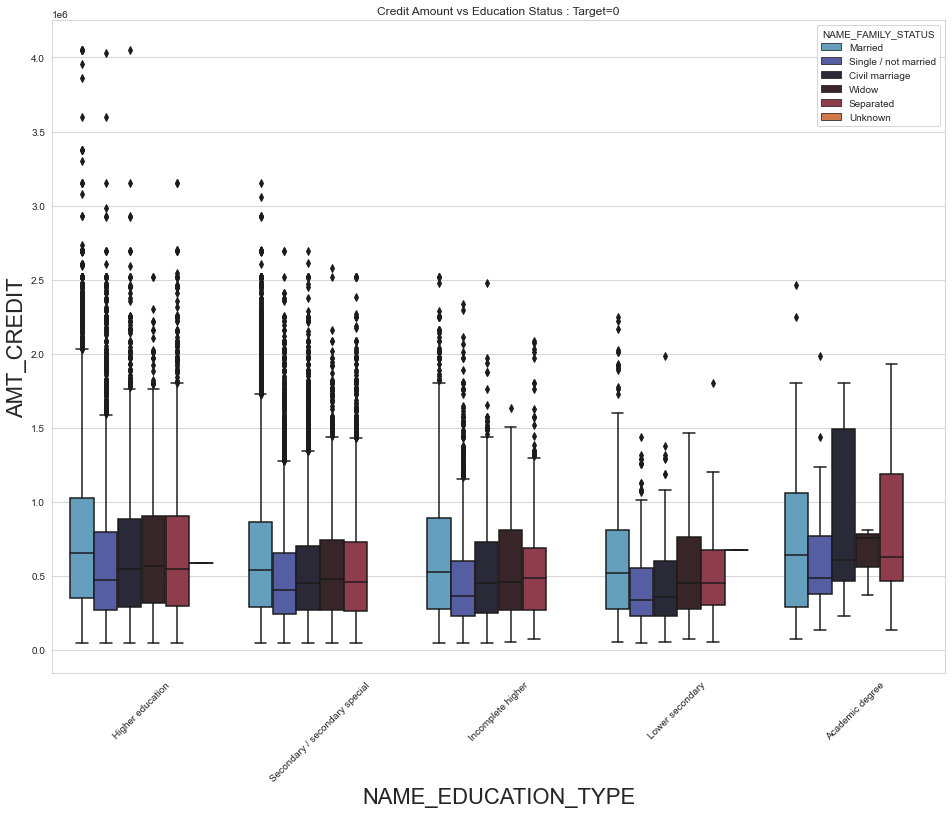

In [98]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT for TARGET=0
sns.set_style('whitegrid')
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='icefire')
plt.title('Credit Amount vs Education Status : Target=0')
plt.show()

## 

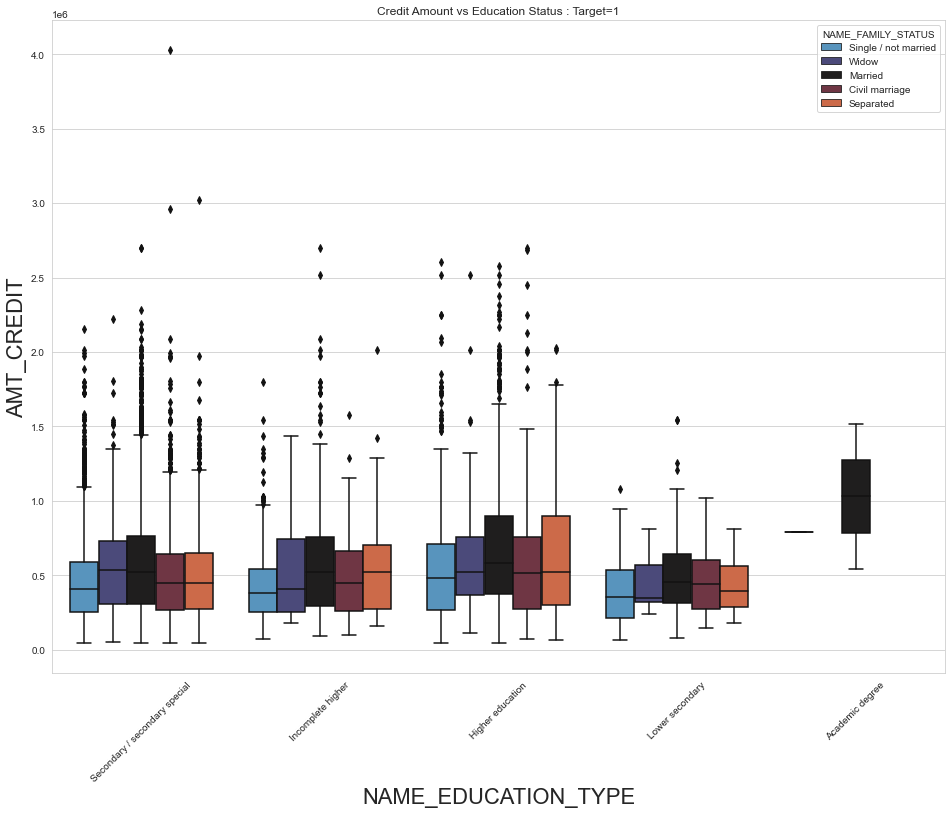

In [99]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='icefire')
plt.title('Credit Amount vs Education Status : Target=1')
plt.rcParams['axes.titleweight']=20
plt.show()

## 

    1. For target=0 Education type "higher education" have the most outliers for'married', 'single' and 'civil marriage' categories.
    2. For target=0 Married people and seperated people with Academic degree have high credit.
    3. For target=0 "Civil Marriage" has most values in third quantile.

    4. For target=1 "Secondary/secondary special" has the most outliers for 'civil marriage' 
    5. For target=1 "Married" of Academic degree has no outliers

Over all the graph of both the variable are same, and secondary and higher education type have the most number of outliers.

## 

#### Income Range VS Credit amount

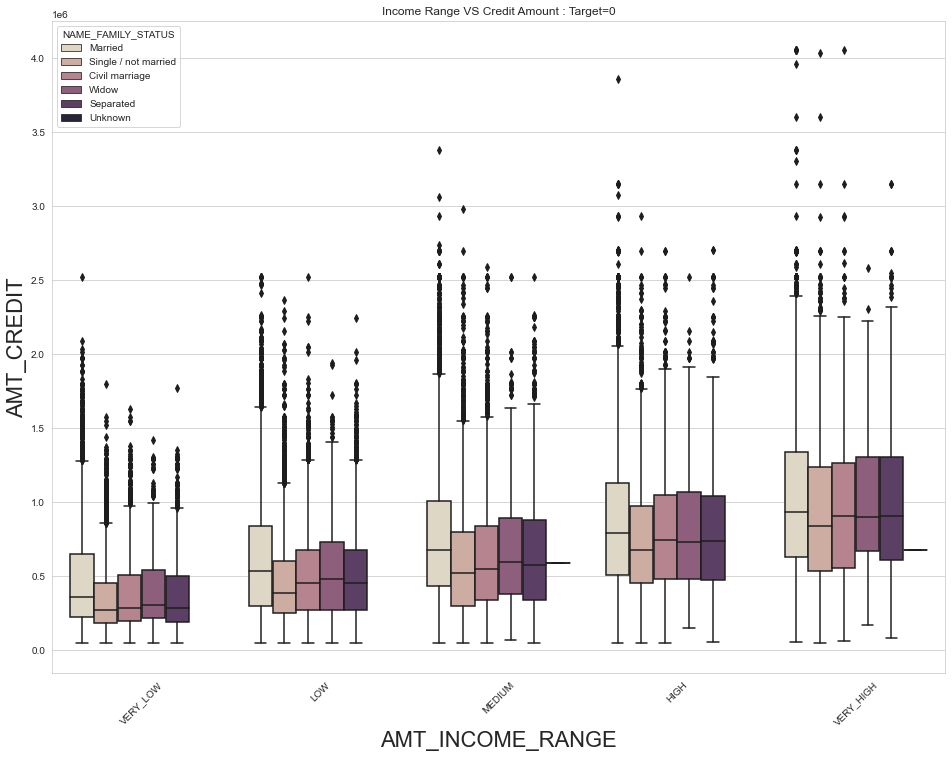

In [100]:
# Income Range VS Credit amount for TARGET=0.
sns.set_style('whitegrid')
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='AMT_INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='ch:s=-.2,r=.6')
plt.title('Income Range VS Credit Amount : Target=0')
plt.rcParams['axes.titleweight']=25
plt.show()

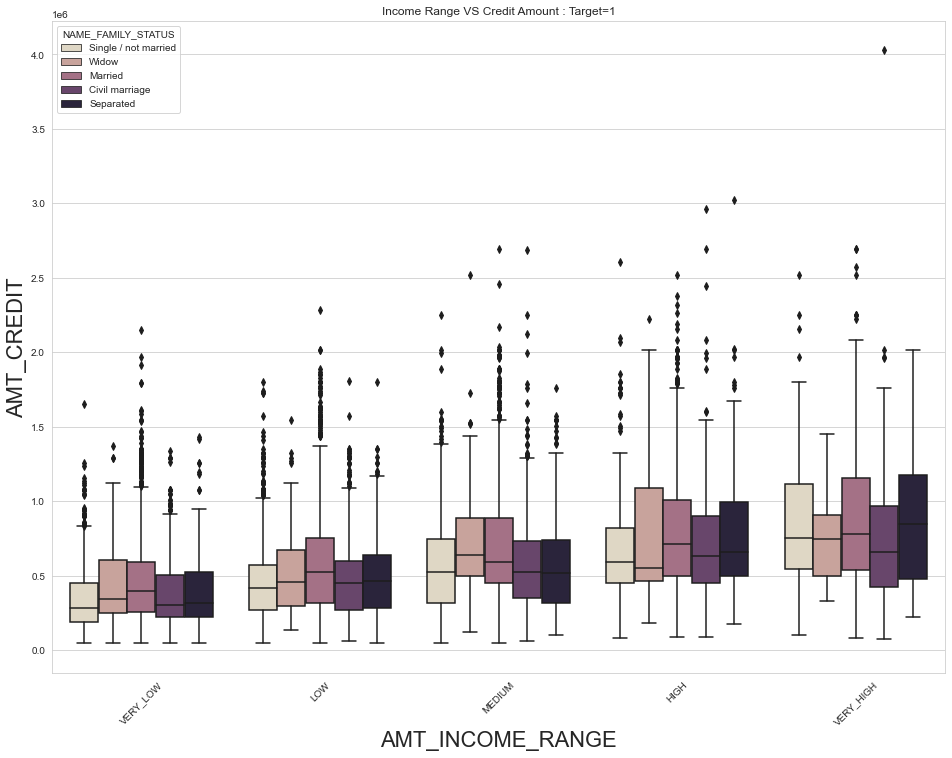

In [101]:
# Income Range VS Credit amount for TARGET=1.
sns.set_style('whitegrid')
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='AMT_INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',palette='ch:s=-.2,r=.6')
plt.title('Income Range VS Credit Amount : Target=1')
plt.rcParams['axes.titleweight']=25
plt.show()

Once again the graphs of Target=0 and Target=1 appears to be similar. I noticed some of the things from the above:

    1. There are some values that seem to be as outliers but actually are not. Specifically in case of Very_High income range.
    2. In both the cases single, seperated,married category with Very_High income have higher credit value that the others.
    3. For target=0 married people tend to have highest values in 3rd quantile in all the income range categories.

##### OCCUPATION TYPE vs TARGET as a whole

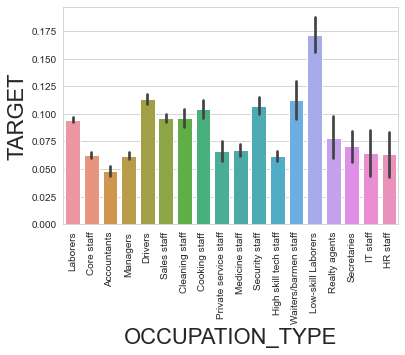

In [102]:
sns.barplot(x='OCCUPATION_TYPE',y='TARGET',data=app_data)
plt.xticks(rotation=90)
plt.show()

## 

    
    from this graph we see that :
        1. Low-Skill labourers category have high defaulting rate.
        2. Accountants have the lowest defaulting rate.

## 

### NUMERICAL VS NUMERICAL

##### To depict analysis for numerical vs numerical the best way is to use pairplot, as it shows multiple graphs at a same grid
and it becomes easier to comprehend.

### FOR TARGET=0

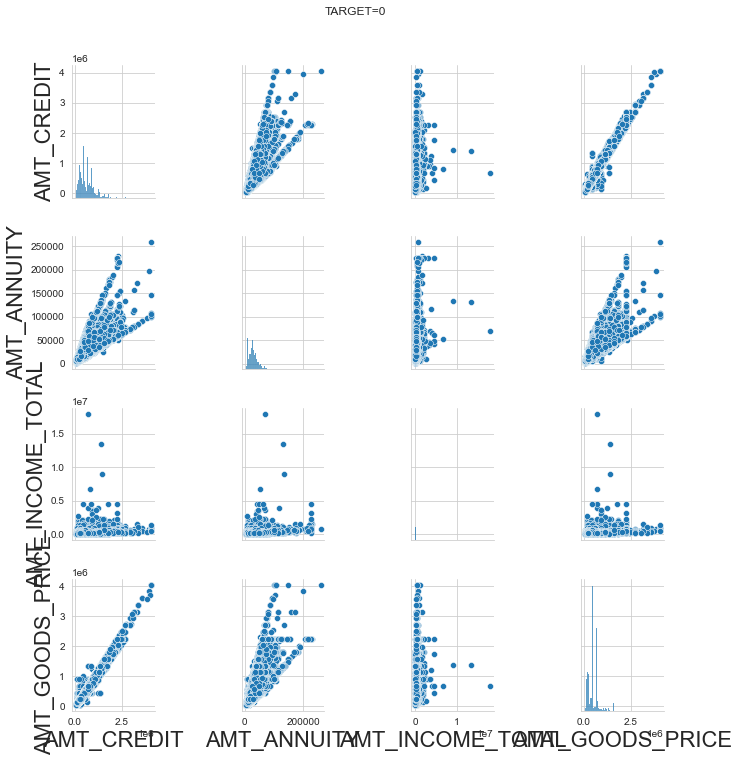

In [103]:
Num_vs_numeric=target_0[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']].fillna(0)

plt.rcParams['axes.titlesize']=5
sns.pairplot(Num_vs_numeric)
plt.suptitle('TARGET=0', y=1.05)
plt.show()

## 

### FOR TARGET=1

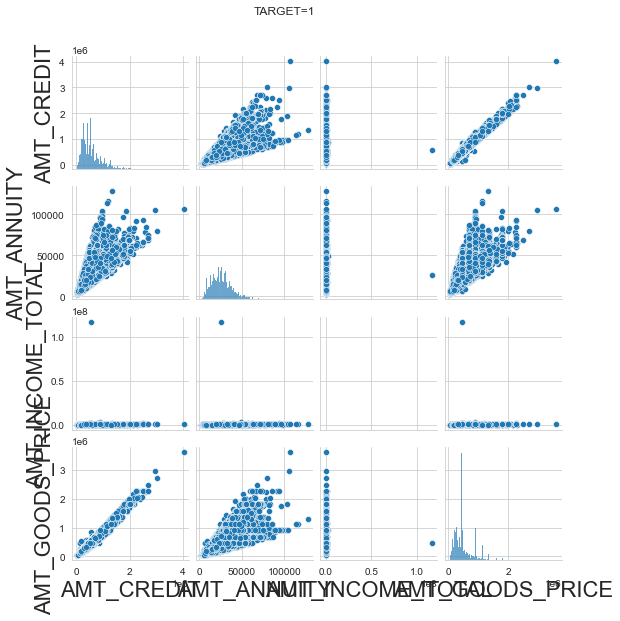

In [104]:
Num_vs_numeric=target_1[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']].fillna(0)

plt.rcParams['axes.titlesize']=5
sns.pairplot(Num_vs_numeric,height=2,aspect=1)
plt.suptitle('TARGET=1', y=1.05)
plt.show()

## 

## CORRELATION HEATMAP of TARGET VARIABLES.

#### TARGET=0 i.e Client with non payment difficulties

<AxesSubplot:>

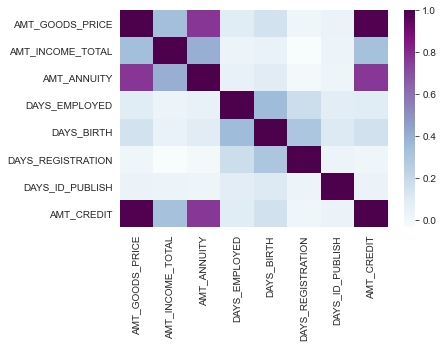

In [105]:

sns.heatmap(data=target_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT']].corr(method = 'pearson'),cmap='BuPu')

#### TARGET=1 i.e. All other/Client with payment difficulties

<AxesSubplot:>

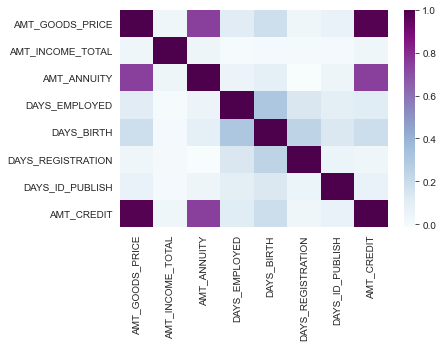

In [106]:
sns.heatmap(data=target_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT']].corr(method = 'pearson'),cmap='BuPu')


    By these plots we see that Credit amount and Goods Price are highly co-related.
    Also there is some devation in co-relation between Total income VS credit amount, total income vs goods price.

## 

## CATEGORY vs CATEGORY

## 

In [107]:
 # creating a function for plotting graphs
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def bi_variate_plot(app_data,feature,title):
    temp = app_data[feature].value_counts()
    
    # Calculating the percentage of target=1 per category value
    perc = app_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig = make_subplots(rows=1, cols=2,subplot_titles=("Count of "+ title,"%age of Loan Payment difficulties of each category"))


    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='%age of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=True)
    fig.show()

In [108]:
# Analysis of Occupation Type with maximum Loan-Payment Difficulties

In [110]:

bi_variate_plot(app_data ,'OCCUPATION_TYPE','Occupation type')

Here we can see that the count of "Low Skill laboureres" is very less where as their loan payment
difficulty is highest amongst the other category.

In [ ]:
# Analysis of Income type for category with highest/lowest loan payment difficulty

In [111]:
bi_variate_plot(app_data,'NAME_INCOME_TYPE','Income type')

From above we see that, the count of income type for Maternity Leave is extremely less,
and hence the the highest loan payment difficulty for this category as compared to others.

In [ ]:
# Analysis of Education type for category with highest/lowest loan payment difficulty

In [112]:
bi_variate_plot(app_data,'NAME_EDUCATION_TYPE','EDUCATION TYPE CATEGORY')


Here we see that "Secondary/Secondary special" category is the highest category of education, 
And the "Lower secondary" category have maximum loan payment issues.

## TOP 10 Correlated variables for Target=1

In [113]:
target_1_corr=target_1_corr.where(np.triu(np.ones(target_1_corr.shape),k=1).astype(np.bool))
corelated_data=target_1_corr.unstack().reset_index()

In [114]:
corelated_data.columns=['VARIABLE_1','VARIABLE_2','CO-RELATION']
corelated_data.dropna(subset=['CO-RELATION'],inplace=True)
corelated_data['corrected_absolute']=corelated_data['CO-RELATION'].abs()

In [115]:
corelated_data.sort_values('corrected_absolute',ascending=False).head(10)

,VARIABLE_1,VARIABLE_2,CO-RELATION,corrected_absolute
734,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998288,0.998288
190,AMT_GOODS_PRICE,AMT_CREDIT,0.982464,0.982464
766,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.867963,0.867963
479,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846872,0.846872
575,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.768247,0.768247
191,AMT_GOODS_PRICE,AMT_ANNUITY,0.748940,0.748940
159,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708
447,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.506747,0.506747
543,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.478266,0.478266
735,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.331534,0.331534


##### THIS GIVES US THE TOP 10 CORRELATIONS

## 

## 

## 

## 

## ➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖

## 

## ANALYSIS ON PREVIOUS APPLICATION DATA


### ----------------------------------------------------------------

### 

### DATA Loading and CLEANING

In [116]:
prev_app_data=pd.read_csv(r'C:\Users\SATYUG\OneDrive\Desktop\DSC-42\DATA Visualisation\Credit EDA Case Study-20220714T131800Z-001\Credit EDA Case Study\previous_application.csv')

In [117]:
prev_app_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [118]:
# Cleaning the missing data

# listing the null values columns having more than 40%

prev_null_col=prev_app_data.isnull().sum()
prev_null_col=prev_null_col[prev_null_col.values>(0.4*len(prev_null_col))]
len(prev_null_col)

15

In [119]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [120]:
prev_app_data.shape

(1670214, 37)

In [121]:
#changing negative values to positive
prev_negative_cols=[col for col in prev_app_data if col.startswith('DAYS')]
prev_app_data[prev_negative_cols]=abs(prev_app_data[prev_negative_cols])

In [122]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# using NaN to replace XNA and XAP values in the data frame.

prev_app_data=prev_app_data.replace('XNA',np.NaN)
prev_app_data=prev_app_data.replace('XAP',np.NaN)

In [124]:
prev_app_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [125]:
prev_app_data['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [126]:
prev_app_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

## 

## UNIVARIATE analysis on prev_app_data

#### which day the client applied for loan in previous data.

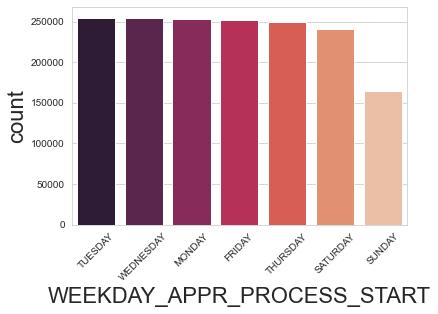

In [127]:
sns.countplot(prev_app_data['WEEKDAY_APPR_PROCESS_START'],palette='rocket',order=prev_app_data['WEEKDAY_APPR_PROCESS_START'].value_counts().index)
plt.xticks(rotation=45)
plt.show()


from this graph we can see that the number of applications decline over the week and by weekend it is the lowest.

##### Reason why the previous application was rejected.

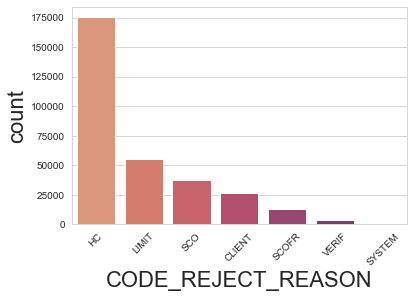

In [128]:
sns.countplot(prev_app_data['CODE_REJECT_REASON'],palette='flare',order=prev_app_data['CODE_REJECT_REASON'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

We see from the graph that HC is the major reason due to which applications got rejected.

##### TYpe of goods a client applied for during the previous application.

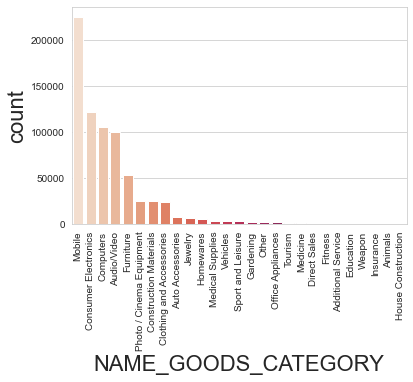

In [129]:
sns.countplot(prev_app_data['NAME_GOODS_CATEGORY'],palette='rocket_r',order=prev_app_data['NAME_GOODS_CATEGORY'].value_counts().index)
sns.set(style='darkgrid')
plt.xticks(rotation=90)
plt.show()

The graph clearly shows that the majority of loans taken were for mobiles,consumer electronics,computers and furnitures.

##### Analysing ANNUITY and its outliers

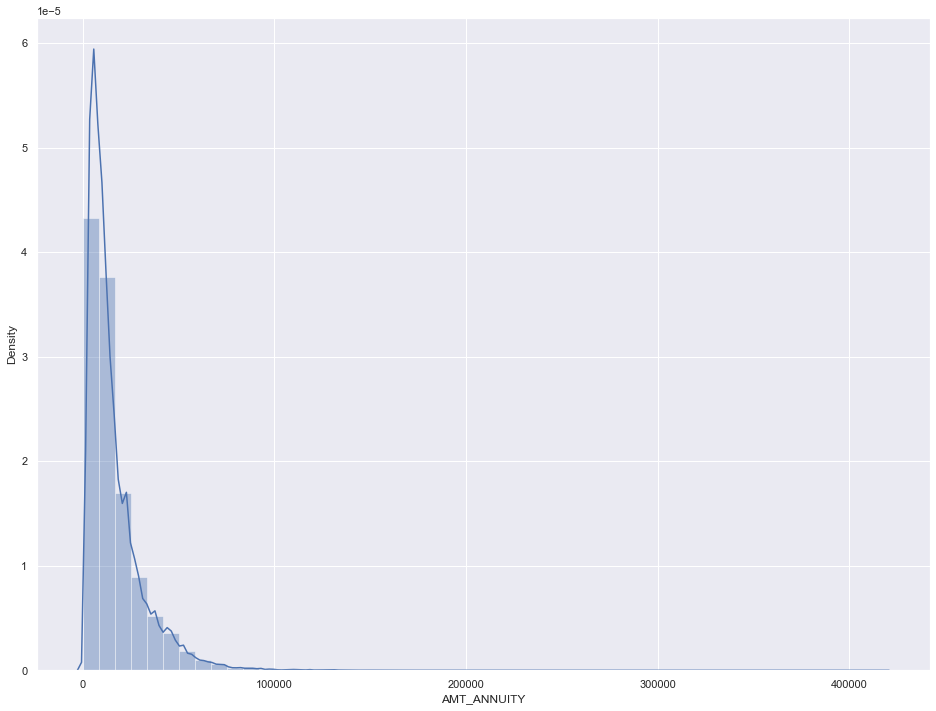

In [130]:
plt.figure(figsize=(16,12))
sns.distplot(prev_app_data.AMT_ANNUITY, bins=50)
plt.show()

looking at this graph we can say that there are some outliers as here we can see some spikes in the graph, Also the curve is not normal or a bell curve.

In [131]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## 

## Merging the TWO dataframes.

In [132]:
# considering TARGET and SK_ID_CURR columns only to be used for furthur analysis.

new_app_data=app_data[['SK_ID_CURR','TARGET']]

In [133]:
new_app_data

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307504,456248,0
307506,456251,0
307508,456253,0
307509,456254,1


In [134]:
merged_data=new_app_data.merge(prev_app_data,on='SK_ID_CURR',how='inner')
merged_data.shape

(1140118, 38)

In [135]:
merged_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,NaN,Approved,2341,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,815,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


## Bi-Variate Analysis

##### Analysis on contract status columns

In [136]:
bi_variate_plot(merged_data,'NAME_CONTRACT_STATUS','CONTRACT STATUS')

    
    1. From the 1st graph we can see that most of the contracts from previous application have been approved.
    2. In 1st graph, there is not much difference in canceled and Refused contracts, from previous applications.
    3. In 2nd plot "Approved" contracts from prev applications have minimum loan repayment difficulties from current application.
    4. Also in 2nd plot "Refused" contracts have highest laon repayment difficulty from current application.

##### Analysis on Payment Type columns

In [137]:
bi_variate_plot(merged_data,'NAME_PAYMENT_TYPE','Payment Type')

     From the graph it is evidfent:   
    1. We see that most of the payment done from previous application was "Cash through Bank"
    2. Also All the 3 payment types had nearly same loan payment difficulty.

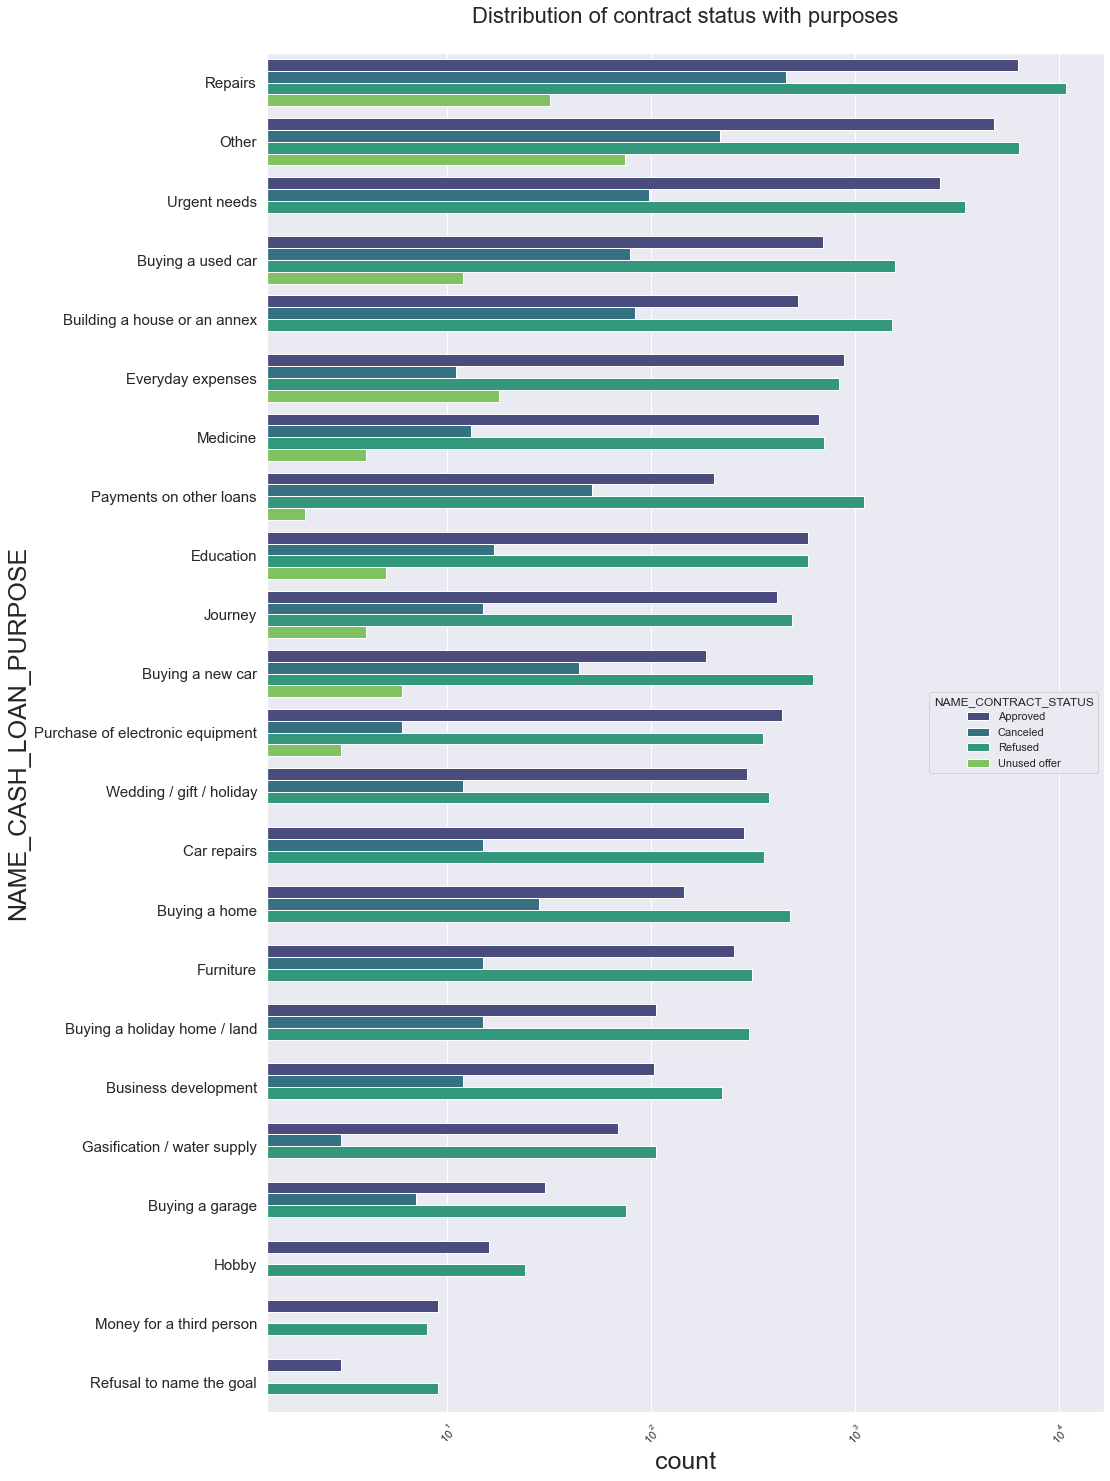

In [138]:
plt.figure(figsize=(15,25))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis') 
ax.set_yticklabels(ax.get_yticklabels(),size=15)
plt.show()

Points to be concluded from above plot:

1. "Other" purpose has highest number of Unused offers.
2. For purpose 'Repairs'the maximum number of loans were Refused.
3. Equal amount of loans were approved as well as rejected for "Education" purpose.
4. Paying other loans and buying a new car both have higher rejection than approves.

In [139]:
bi_variate_plot(merged_data,'NAME_CASH_LOAN_PURPOSE','Purpose Of CASH loan')

## ⬆

    1. We can see here that Maximum Cash loans were given for "Repair" purpose
    2. "Refusal to name the goal" has the most difficulty in loan payment.


In [140]:
TABLE = pd.pivot_table(merged_data, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

In [141]:
TABLE

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.083135,0.096934,0.137385,0.087533
Consumer loans,0.078575,0.134438,0.107028,0.085215
Revolving loans,0.094856,0.117978,0.136552,0.000000


<Figure size 1296x1584 with 0 Axes>

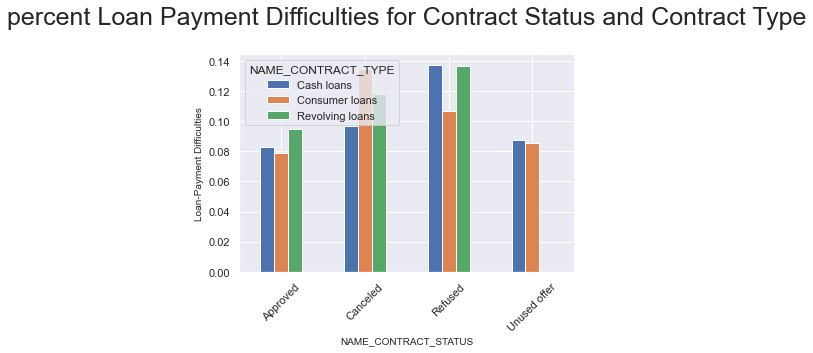

In [147]:
plt.figure(figsize=(18,22))
ax = TABLE.T.plot(kind='bar')
ylab = ax.set_ylabel('Loan-Payment Difficulties')

plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 10
plt.title('percent Loan Payment Difficulties for Contract Status and Contract Type', fontdict={'fontsize':25})
plt.show()

Points to be concluded from above plot:

1. Revolving loans with Refused previous application habe more loan payment difficulties in current application
2. Also Cash loans with Refused previous application also have high loan payment difficulties in current application
3. All types of approved loans have significantly low loan payment diffuculties as compared to others.

##### ______________ END_______________